In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import jupyterlab
#!pip install torch torchvision
#import torch
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d

# Case of fully labeled data with two categories (very 'artisanal' procedure)

In [2]:
whole_space_x = np.random.uniform(low=-5., high=6., size=10000)
whole_space_y = np.random.uniform(low=-2., high=8., size=10000)

whole_space = np.vstack((whole_space_x,whole_space_y))
whole_space = np.transpose(whole_space)

In [3]:
cov_blue = np.vstack(([1/8,0],[0,1/4]))
mean_blue = np.array(([0,0]))
cov_red = np.vstack(([2,0],[0,1/2]))
mean_red = np.array(([1,2]))

In [4]:
gaussian_blue = np.random.multivariate_normal(mean=mean_blue, cov=cov_blue, size=100)
gaussian_red = np.random.multivariate_normal(mean=mean_red, cov=cov_red, size=100)

In [5]:
ellipse_red = Ellipse(xy=(1,2), width=2*np.sqrt(2), height=2*np.sqrt(1/2),
                      edgecolor='r', fc='None', lw=1)
ellipse_blue=Ellipse(xy=(0,0), width=2*np.sqrt(1/8), height=2*np.sqrt(1/4),
                     edgecolor='b', fc='None', lw=1)

/tmp/ipykernel_5196/1613248164.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_5196/1613248164.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_5196/1613248164.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
/tmp/ipykernel_5196/1613248164.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt s

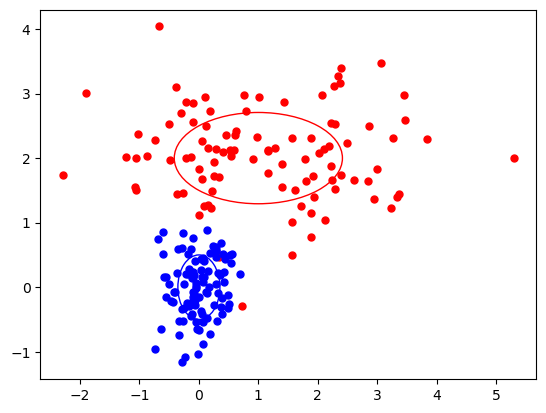

In [6]:
plt.figure()
plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
ax = plt.gca()
ax.add_patch(ellipse_blue)
ax.add_patch(ellipse_red)

In [7]:
label_1 = np.ones(100)
label_0 = np.zeros(100)
label_1 = label_1[:,np.newaxis]
label_0 = label_0[:,np.newaxis]

In [8]:
red_data = np.concatenate((gaussian_red, label_1), axis=1)

In [9]:
blue_data = np.concatenate((gaussian_blue, label_0), axis=1)

In [10]:
whole_data = np.vstack((red_data, blue_data))

In [11]:
whole_data = pd.DataFrame(whole_data) #in order to be able to order later or select sepcific columns and values

In [12]:
mean_blue = np.mean(blue_data[:,:2], axis=0)
mean_red = np.mean(red_data[:,:2], axis=0)

In [13]:
cov_blue = np.cov(blue_data[:,:2], rowvar=False)
cov_red = np.cov(red_data[:,:2], rowvar=False)

In [14]:
def classifier_values(m, pi_m, mu_hat_m, sigma_hat_m,x_test):
    """compute the conditional density of y for a certain m given x

    Parameters:
    --------------------------
    m: int
    the class of y
    
    pi_m: float
    the probability of y belonging to the class

    mu_hat_m : array-like object
    the mean of the x's that have a y in the class m

    sigma_hat_m: 2-D array-like object
    the estimated covariance matrix for a certain class

    x_test: array-like object
    test input
    -------------------------
    """
    y = np.log(pi_m) + multivariate_normal.logpdf(x=x_test, mean=mu_hat_m, cov=sigma_hat_m)
    return y

In [15]:
#for the blue ones
dens_for_blue = np.zeros(10000)
for i in range(10000):
    dens_for_blue[i] = classifier_values(m=0,pi_m=1/2,
                                         mu_hat_m=mean_blue,sigma_hat_m=cov_blue,
                                         x_test=whole_space[i,:])

#for the red ones
dens_for_red = np.zeros(10000)
for i in range(10000):
    dens_for_red[i] = classifier_values(m=1,pi_m=1/2,
                                         mu_hat_m=mean_red,sigma_hat_m=cov_red,
                                         x_test=whole_space[i,:])

In [16]:
all_output = np.vstack((dens_for_blue,dens_for_red))
all_output = np.transpose(all_output)

In [17]:
retained_blue = np.empty(shape=(0,2))
retained_red = np.empty(shape=(0,2))

In [18]:
for i in range(10000):
    if all_output[i,0]>all_output[i,1]:
        retained_blue = np.vstack((retained_blue, whole_space[i,:]))
    else:
        retained_red = np.vstack((retained_red, whole_space[i,:]))

/tmp/ipykernel_5196/667839963.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_5196/667839963.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_5196/667839963.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
/tmp/ipykernel_5196/667839963.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt strin

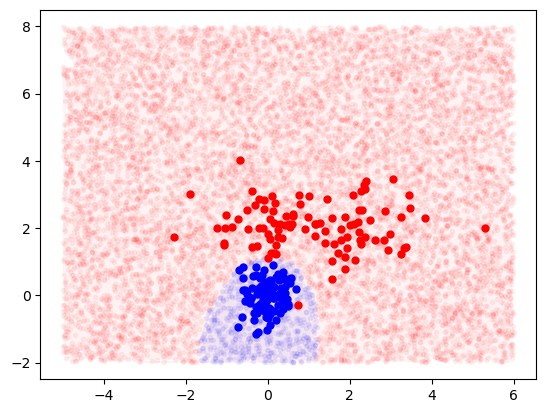

In [19]:
plt.plot(retained_blue[:,0], retained_blue[:,1], alpha=0.05, marker='.', color='b')
plt.plot(retained_red[:,0], retained_red[:,1], alpha=0.05, marker='.', color='r')
plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)

# Case of fully labeled data, multiple categories

In [20]:
cov_1 = np.vstack(([1/8,0],[0,1/4]))
mean_1 = np.array(([2,0]))
cov_2 = np.vstack(([2,0],[0,1/2]))
mean_2 = np.array(([3,6]))
cov_3 = np.vstack(([1,0],[0,2]))
mean_3 = np.array(([-2,4]))
cov_4 = np.vstack(([1/8,0],[0,1/16]))
mean_4 = np.array(([-2,0]))

In [21]:
gaussian_1 = np.random.multivariate_normal(mean=mean_1, cov=cov_1, size=100)
gaussian_2 = np.random.multivariate_normal(mean=mean_2, cov=cov_2, size=100)
gaussian_3 = np.random.multivariate_normal(mean=mean_3, cov=cov_3, size=100)
gaussian_4 = np.random.multivariate_normal(mean=mean_4, cov=cov_4, size=100)

In [22]:
list_of_cols = ['b','r','g','m']

list_labeled = [gaussian_1,gaussian_2,gaussian_3,gaussian_4]

/tmp/ipykernel_5196/1460800915.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)
/tmp/ipykernel_5196/1460800915.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)


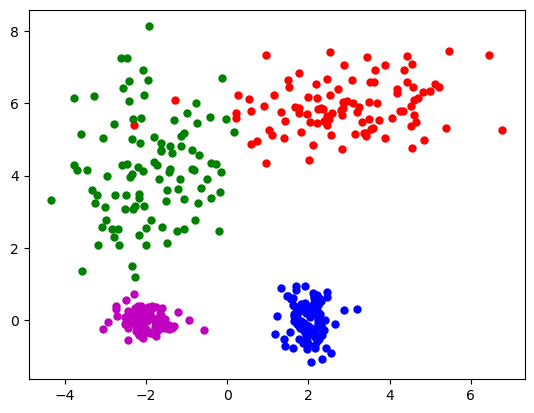

In [23]:
for i in range(4):
    gaussian_distrib = list_labeled[i]
    plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)

In [24]:
parameters_estimated = {}
for i in range(4):
    parameters_estimated['mean_{0}'.format(i)] = np.mean(list_labeled[i][:,:], axis=0)
    parameters_estimated['cov_{0}'.format(i)] = np.cov(list_labeled[i][:,:], rowvar=False)

In [25]:
y_values = {}
for category in range(4):
    list_of_output = []
    for i in range(10000):
        y = classifier_values(m=i, pi_m=1/4,
                              mu_hat_m=parameters_estimated[f'mean_{category}'],
                              sigma_hat_m=parameters_estimated[f'cov_{category}'],x_test=whole_space[i,:])
        list_of_output.append(y)
        
    y_values['class_{0}'.format(category)] = list_of_output

In [26]:
total_output = np.zeros((10000,4))

In [27]:
for category in range(4):
    for i in range(10000):
        total_output[i,category] = y_values[f'class_{category}'][i]

In [28]:
retained_dict = {'0':[], '1':[], '2':[], '3':[]}
for i in range(10000):
    values = total_output[i,:]
    llmax = np.max(values)
    retained_dict[str(np.where(values == llmax)[0][0])].append(whole_space[i,:])
    

In [29]:
to_plot_0 = np.empty((len(retained_dict['0']),2))
to_plot_1 = np.empty((len(retained_dict['1']),2))
to_plot_2 = np.empty((len(retained_dict['2']),2))
to_plot_3 = np.empty((len(retained_dict['3']),2))
for i in range(len(retained_dict['0'])):
    to_plot_0[i] = retained_dict[str(0)][i]
for i in range(len(retained_dict['1'])):
    to_plot_1[i] = retained_dict[str(1)][i]
for i in range(len(retained_dict['2'])):
    to_plot_2[i] = retained_dict[str(2)][i]
for i in range(len(retained_dict['3'])):
    to_plot_3[i] = retained_dict[str(3)][i]

/tmp/ipykernel_5196/3015894690.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)
/tmp/ipykernel_5196/3015894690.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)


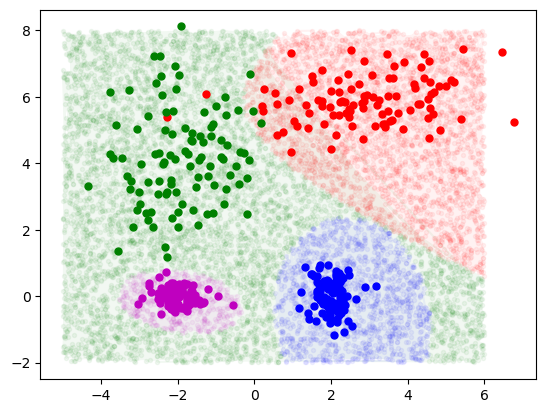

In [30]:
plt.plot(to_plot_0[:,0], to_plot_0[:,1], alpha=0.05, marker='.', color='b')
plt.plot(to_plot_1[:,0], to_plot_1[:,1], alpha=0.05, marker='.', color='r')
plt.plot(to_plot_2[:,0], to_plot_2[:,1], alpha=0.05, marker='.', color='g')
plt.plot(to_plot_3[:,0], to_plot_3[:,1], alpha=0.05, marker='.', color='m')
for i in range(4):
    gaussian_distrib = list_labeled[i]
    plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)

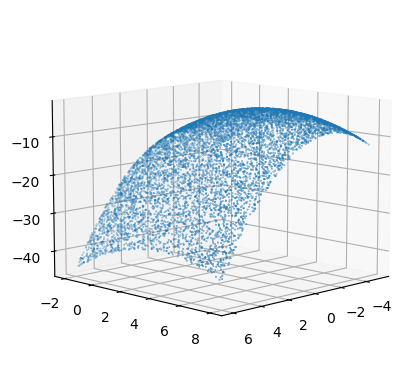

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(whole_space_x,whole_space_y,
           classifier_values(m=1,pi_m=1/4,mu_hat_m=mean_3, sigma_hat_m=cov_3, x_test=whole_space),
           s = 0.1)
ax.view_init(10, 45) 

In [32]:
x_axis = np.ones(1000)*(-2)
y_axis = np.ones(1000)*(4)
z_axis = np.linspace(start=-1,stop=250,num=1000)

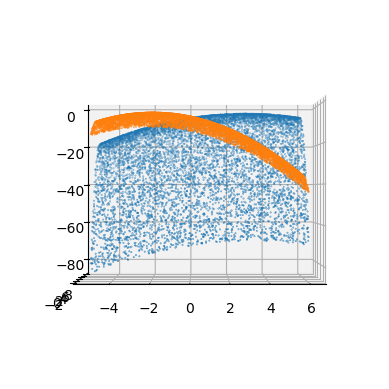

In [33]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(whole_space_x,whole_space_y,
           classifier_values(m=1,pi_m=1/4,mu_hat_m=mean_2, sigma_hat_m=cov_2, x_test=whole_space),
           s = 0.1)
ax.scatter(whole_space_x,whole_space_y,
           classifier_values(m=1,pi_m=1/4,mu_hat_m=mean_3, sigma_hat_m=cov_3, x_test=whole_space),
           s = 0.1)
#ax.scatter(x_axis,y_axis,z_axis,s = 0.1)
ax.view_init(0, 270)

# Case of unlabeled data

In [34]:
mean_lab_0 = np.array([0,0])
cov_lab_0 = np.vstack(([1/8,0],[0,1/2]))
mean_lab_1 = np.array([1,3])
cov_lab_1 = np.vstack(([2,0],[0,1]))

In [35]:
labeled_0 = np.random.multivariate_normal(mean=mean_lab_0, cov=cov_lab_0, size=10)
unlabeled_0 = np.random.multivariate_normal(mean=mean_lab_0, cov=cov_lab_0, size=100)
labeled_1 = np.random.multivariate_normal(mean=mean_lab_1, cov=cov_lab_1, size=10)
unlabeled_1 = np.random.multivariate_normal(mean=mean_lab_1, cov=cov_lab_1, size=100)

In [36]:
label_0 = np.zeros(10)
label_1 = np.ones(10)

In [37]:
full_labeled = np.vstack((labeled_0,labeled_1))

In [38]:
df_full_label = pd.DataFrame(full_labeled)

In [39]:
all_labels = np.hstack((label_0,label_1))

In [40]:
df_all_labels = pd.DataFrame(all_labels)

In [41]:
labeled_data = pd.concat([df_full_label, df_all_labels], axis=1)

In [42]:
full_unlabeled = np.vstack((unlabeled_0, unlabeled_1))

In [43]:
df_full_unlabeled = pd.DataFrame(full_unlabeled)

In [44]:
df_full_unlabeled['label']=np.ones(200)*99

In [45]:
labeled_data.columns = ['x_1', 'x_2', 'label']

In [46]:
df_full_unlabeled.columns = ['x_1', 'x_2', 'label']

In [47]:
whole_data = pd.concat([labeled_data,df_full_unlabeled])

In [48]:
colors = {0:'blue', 1:'red', 99:'grey'}
color_list = [colors[group] for group in whole_data['label']]

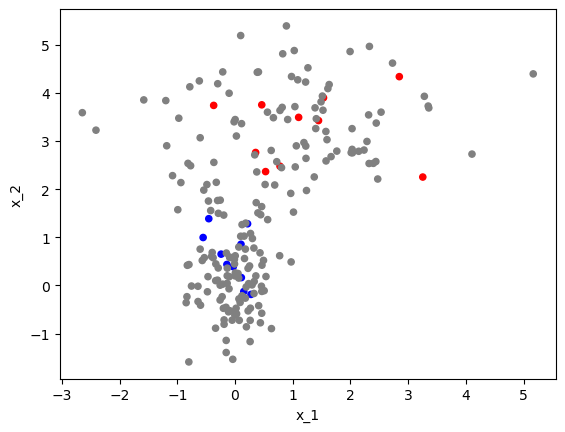

In [49]:
ax = whole_data.plot.scatter('x_1','x_2', c=color_list)

In [50]:
estimated_mean_0 = np.mean(labeled_0, axis=0)
estimated_cov_0 = np.cov(labeled_0, rowvar=False)
estimated_mean_1 = np.mean(labeled_1, axis=0)
estimated_cov_1 = np.cov(labeled_1, rowvar=False)

In [51]:
whole_data = pd.concat([labeled_data, df_full_unlabeled], axis=0)

In [52]:
whole_data = whole_data.reset_index(drop=True)

In [53]:
weights = np.ones((220,5))

In [54]:
for i in range(whole_data.shape[0]):
    weights[i,0] = whole_data['x_1'][i]
    weights[i,1] = whole_data['x_2'][i]
    if whole_data['label'][i] == 0:
        weights[i,2] = 1
        weights[i,3] = 0
        weights[i,4] = 0
    elif whole_data['label'][i] == 1:
        weights[i,2] = 0
        weights[i,3] = 1
        weights[i,4] = 1
    else:
        weights[i,4] = 99

### so we define our matrix weights as it follows : 
The two first columns are for the data, their coordinates.

The third one is for the weights for the category 0.

The fourth, for the weights for the category 1.

The fifth will be updated at the end to 'conclude' the predictions, it will contain the label predicted.

In [55]:
whole_data['label'][3]

0.0

In [56]:
weighted_data = weights

In [57]:
n=0
pi_gmm_0 = 1/2
pi_gmm_1 = 1/2
mu_hat_gmm_0 = estimated_mean_0
sigma_hat_gmm_0 = estimated_cov_0
mu_hat_gmm_1 = estimated_mean_1
sigma_hat_gmm_1 = estimated_cov_1
while n<=100:
    #first, compute the new weights
    for i in range(220):
        if weighted_data[i,4] == 99:
            weight_0 = multivariate_normal.pdf(x=weighted_data[i,0:2],
                                               mean=mu_hat_gmm_0,cov=sigma_hat_gmm_0)            
            weight_1 = multivariate_normal.pdf(x=weighted_data[i,0:2],
                                               mean=mu_hat_gmm_1,cov=sigma_hat_gmm_1)
            denom = (pi_gmm_0*weight_0)+(pi_gmm_1*weight_1)
            weighted_data[i,2] = (pi_gmm_0*weight_0)/denom
            weighted_data[i,3] = (pi_gmm_1*weight_1)/denom
    #update of the parameters
    #dictionnary would probably be more efficient
    pi_gmm_0 = np.mean(weighted_data[:,2])
    pi_gmm_1 = np.mean(weighted_data[:,3])
    sum_weights_0 = np.sum(weighted_data[:,2])
    sum_weights_1 = np.sum(weighted_data[:,3])
    mu_hat_gmm_0 = np.sum(weighted_data[:,0:2]*weighted_data[:,2].reshape((220,1)),axis=0)/sum_weights_0
    mu_hat_gmm_1 = np.sum(weighted_data[:,0:2]*weighted_data[:,3].reshape((220,1)),axis=0)/sum_weights_1
    sigma_hat_gmm_0 = np.zeros((2,2))
    sigma_hat_gmm_1 = np.zeros((2,2))
    for i in range(220):
        sigma_hat_gmm_0 = sigma_hat_gmm_0 + np.matmul((weighted_data[i,0:2]-mu_hat_gmm_0).reshape((2,1)),(weighted_data[i,0:2]-mu_hat_gmm_0).reshape((1,2)))*weighted_data[i,2]
        sigma_hat_gmm_1 = sigma_hat_gmm_1 + np.matmul((weighted_data[i,0:2]-mu_hat_gmm_1).reshape((2,1)),(weighted_data[i,0:2]-mu_hat_gmm_1).reshape((1,2)))*weighted_data[i,3]
    sigma_hat_gmm_0 = sigma_hat_gmm_0/sum_weights_0
    sigma_hat_gmm_1 = sigma_hat_gmm_1/sum_weights_1
    n += 1


In [58]:
for i in range(220):
    if weighted_data[i,2]>weighted_data[i,3]:
        weighted_data[i,4] = 0
    else:
        weighted_data[i,4] = 1

In [59]:
plotable = pd.DataFrame(weighted_data)

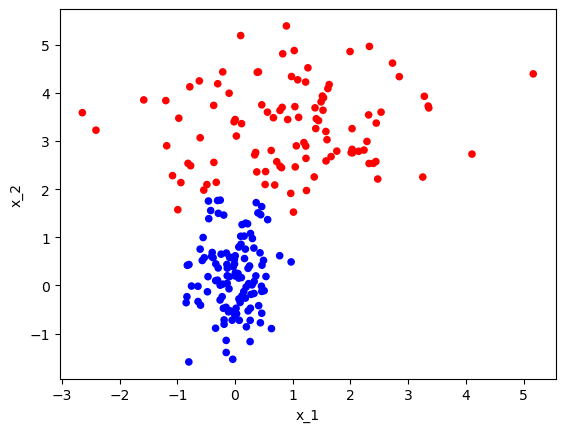

In [60]:
plotable.columns = ['x_1','x_2','w_0','w_1','label']
colors = {0:'blue', 1:'red'}
color_list = [colors[group] for group in plotable['label']]
ax = plotable.plot.scatter('x_1','x_2', c=color_list)